In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:

import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, f1_score,recall_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

In [4]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)

In [5]:

#Read data for analysis
data=pd.read_csv('Documents/big data project data/covtype.csv')

In [6]:
print(data.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [8]:
#check for null values
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [9]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [10]:
#lets look at the class balance
class_dist=data.groupby('Cover_Type').size()
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

Cover_Type 1
36.46 %
Cover_Type 2
48.76 %
Cover_Type 3
6.15 %
Cover_Type 4
0.47 %
Cover_Type 5
1.63 %
Cover_Type 6
2.99 %
Cover_Type 7
3.53 %


<Axes: xlabel='Cover_Type', ylabel='count'>

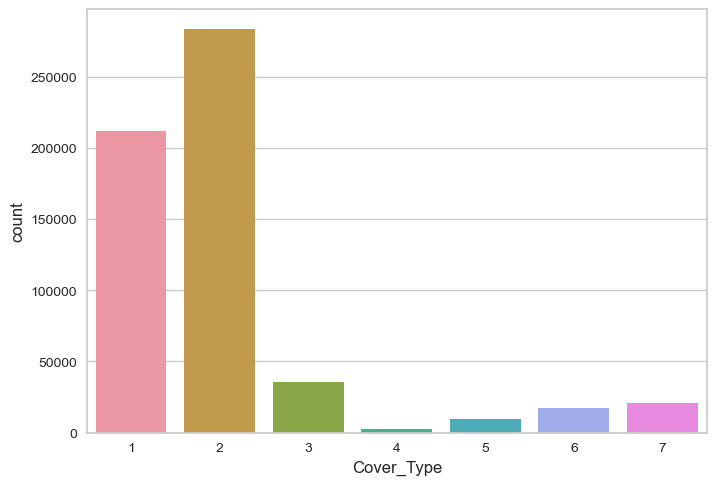

In [11]:
# Distribution of Cover_Type

sns.countplot(data=data, x='Cover_Type')

it looks like "Cover_Type 2" is the most common type, accounting for almost 49% of the dataset,
followed by "Cover_Type 1" at 36.46%. "Cover_Type 4" is the least common, at only 0.47%.

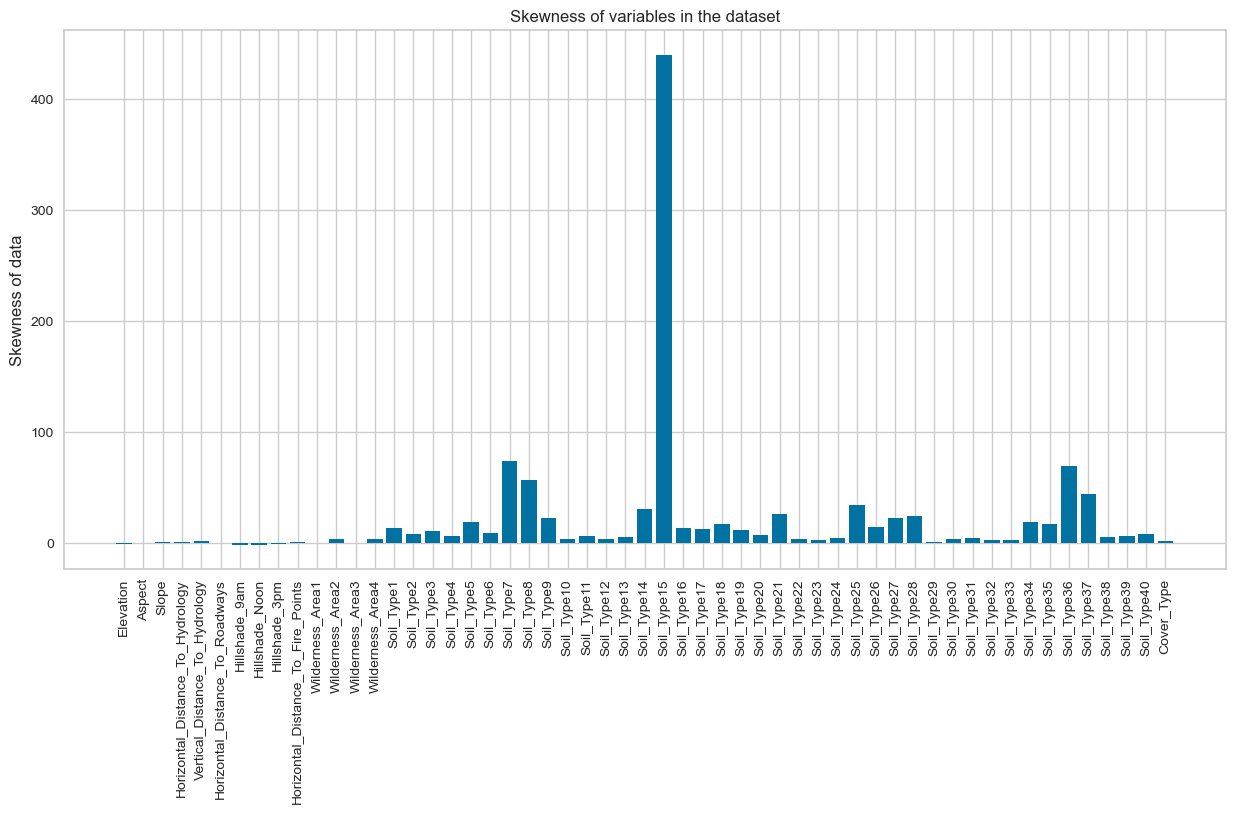

In [12]:
#lets look at the skewness of the data

skewness = data.skew()

# Create a bar plot using Matplotlib
fig, ax = plt.subplots(figsize=(15, 7))
ax.bar(x=range(len(skewness)), height=skewness)
ax.set_xticks(range(len(skewness)))
ax.set_xticklabels(data.columns, rotation=90)
ax.set_ylabel('Skewness of data')
ax.set_title('Skewness of variables in the dataset')
plt.show()

The results show that some variables, especially those related to soil types, are highly skewed. This information is useful because it can help identify potential problems with the dataset, such as the existence of soil types with very few occurrences.

In [13]:

binary_data=data.loc[:,'Wilderness_Area1':'Soil_Type40']

continous_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soiltype_data=data.loc[:,'Soil_Type1':'Soil_Type40']

In [14]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

Wilderness_Area1 0    320216
1    260796
Name: Wilderness_Area1, dtype: int64
Wilderness_Area2 0    551128
1     29884
Name: Wilderness_Area2, dtype: int64
Wilderness_Area3 0    327648
1    253364
Name: Wilderness_Area3, dtype: int64
Wilderness_Area4 0    544044
1     36968
Name: Wilderness_Area4, dtype: int64
Soil_Type1 0    577981
1      3031
Name: Soil_Type1, dtype: int64
Soil_Type2 0    573487
1      7525
Name: Soil_Type2, dtype: int64
Soil_Type3 0    576189
1      4823
Name: Soil_Type3, dtype: int64
Soil_Type4 0    568616
1     12396
Name: Soil_Type4, dtype: int64
Soil_Type5 0    579415
1      1597
Name: Soil_Type5, dtype: int64
Soil_Type6 0    574437
1      6575
Name: Soil_Type6, dtype: int64
Soil_Type7 0    580907
1       105
Name: Soil_Type7, dtype: int64
Soil_Type8 0    580833
1       179
Name: Soil_Type8, dtype: int64
Soil_Type9 0    579865
1      1147
Name: Soil_Type9, dtype: int64
Soil_Type10 0    548378
1     32634
Name: Soil_Type10, dtype: int64
Soil_Type11 0    568602
1 

In [15]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] #considering all one's among 1 and 0's in each soil type
    if count < 1000:
        print(col,count)

Soil Type  Occurence_count
Soil_Type7 105
Soil_Type8 179
Soil_Type14 599
Soil_Type15 3
Soil_Type21 838
Soil_Type25 474
Soil_Type28 946
Soil_Type36 119
Soil_Type37 298


# Explorartory Data Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Wilderness_Area1'),
  Text(1, 0, 'Wilderness_Area3'),
  Text(2, 0, 'Wilderness_Area4'),
  Text(3, 0, 'Wilderness_Area2')])

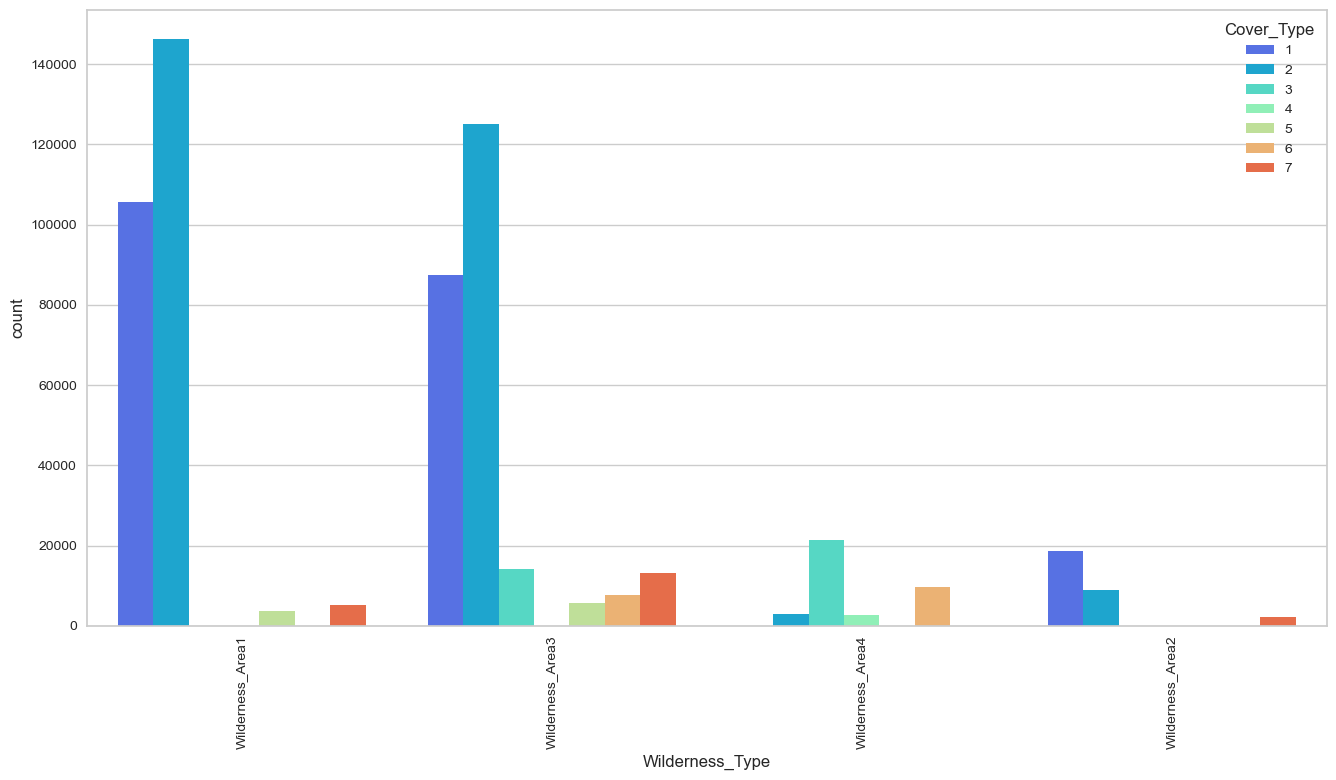

In [16]:
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

data['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1)
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

<Axes: >

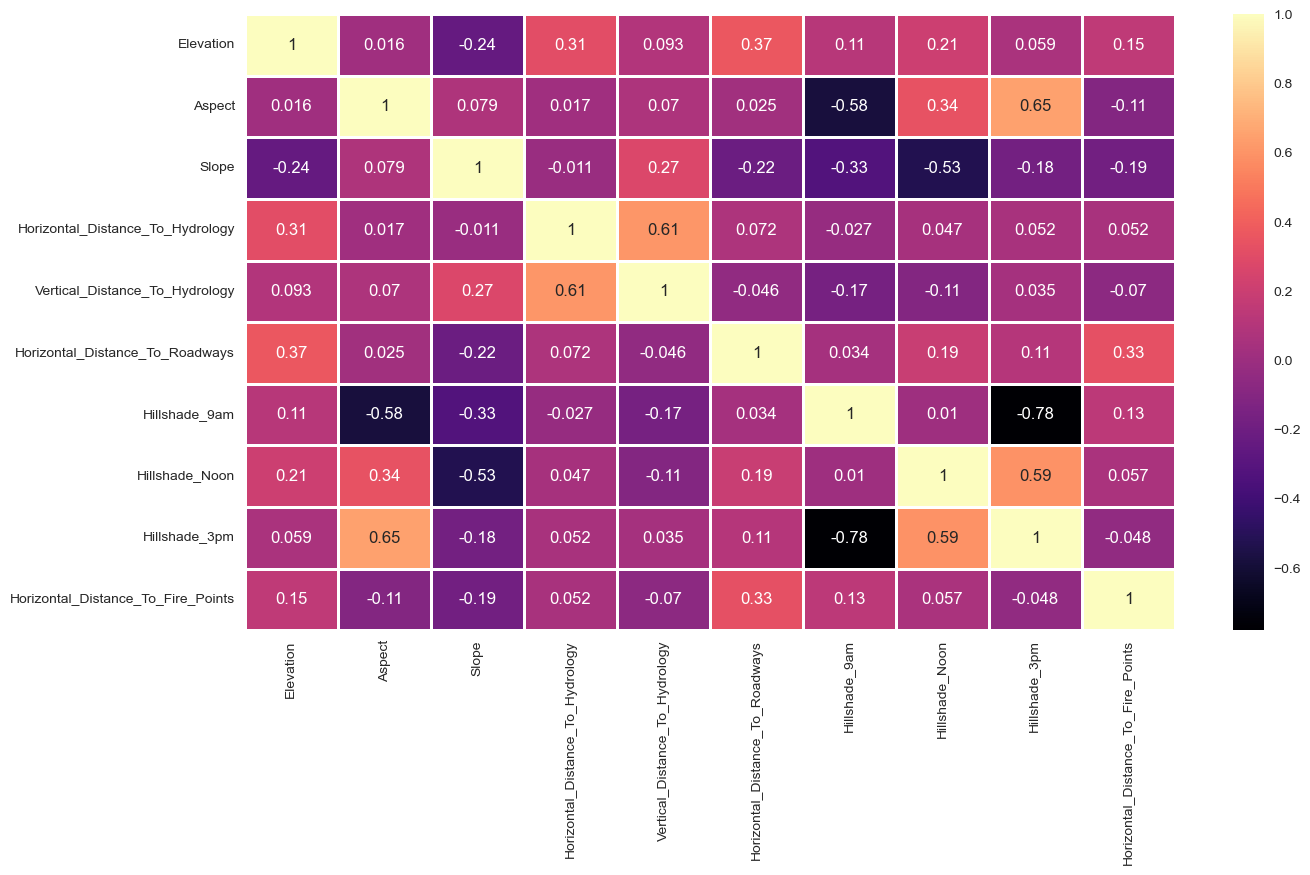

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(continous_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

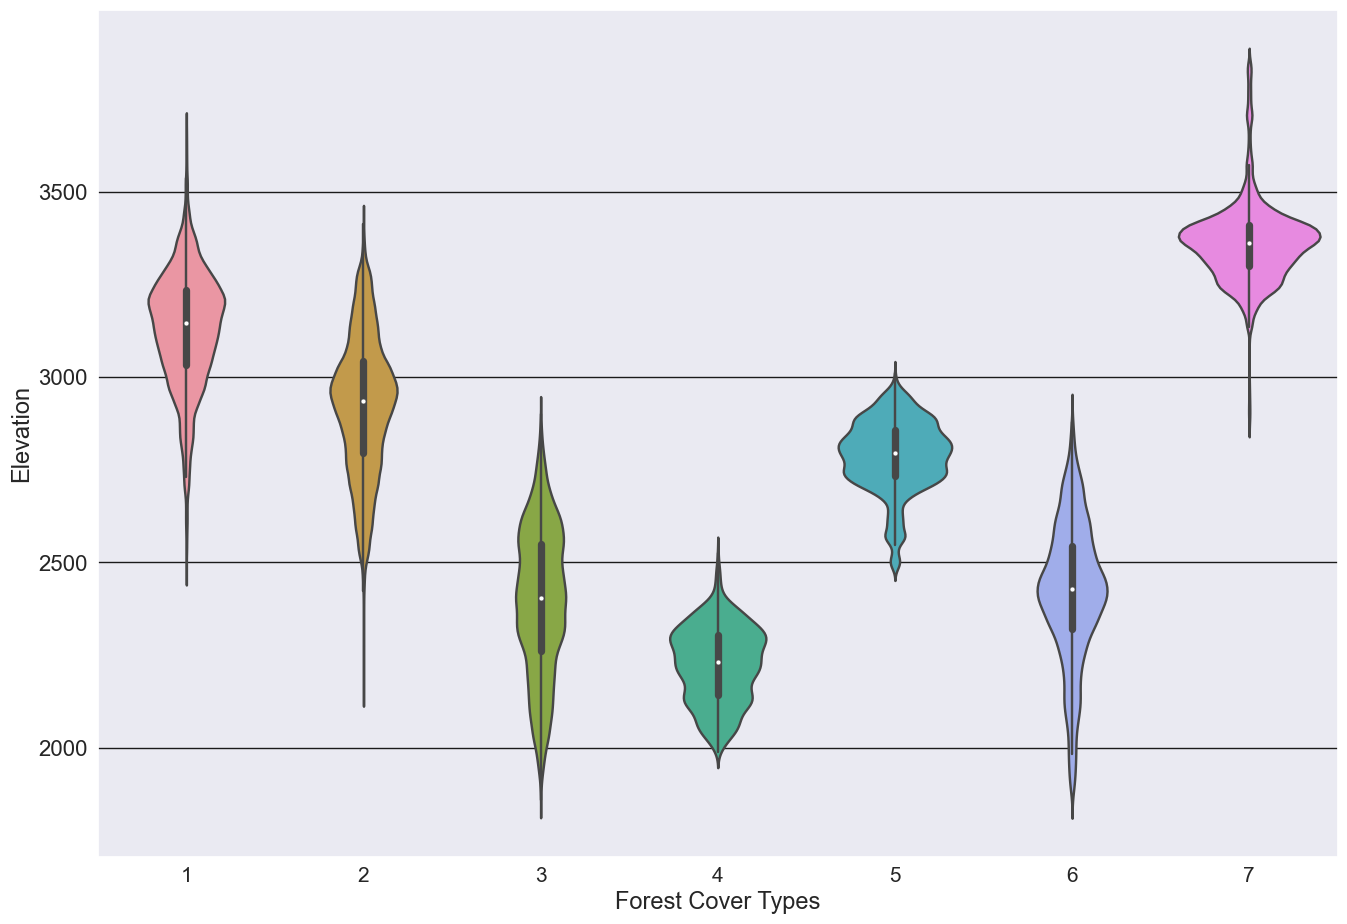

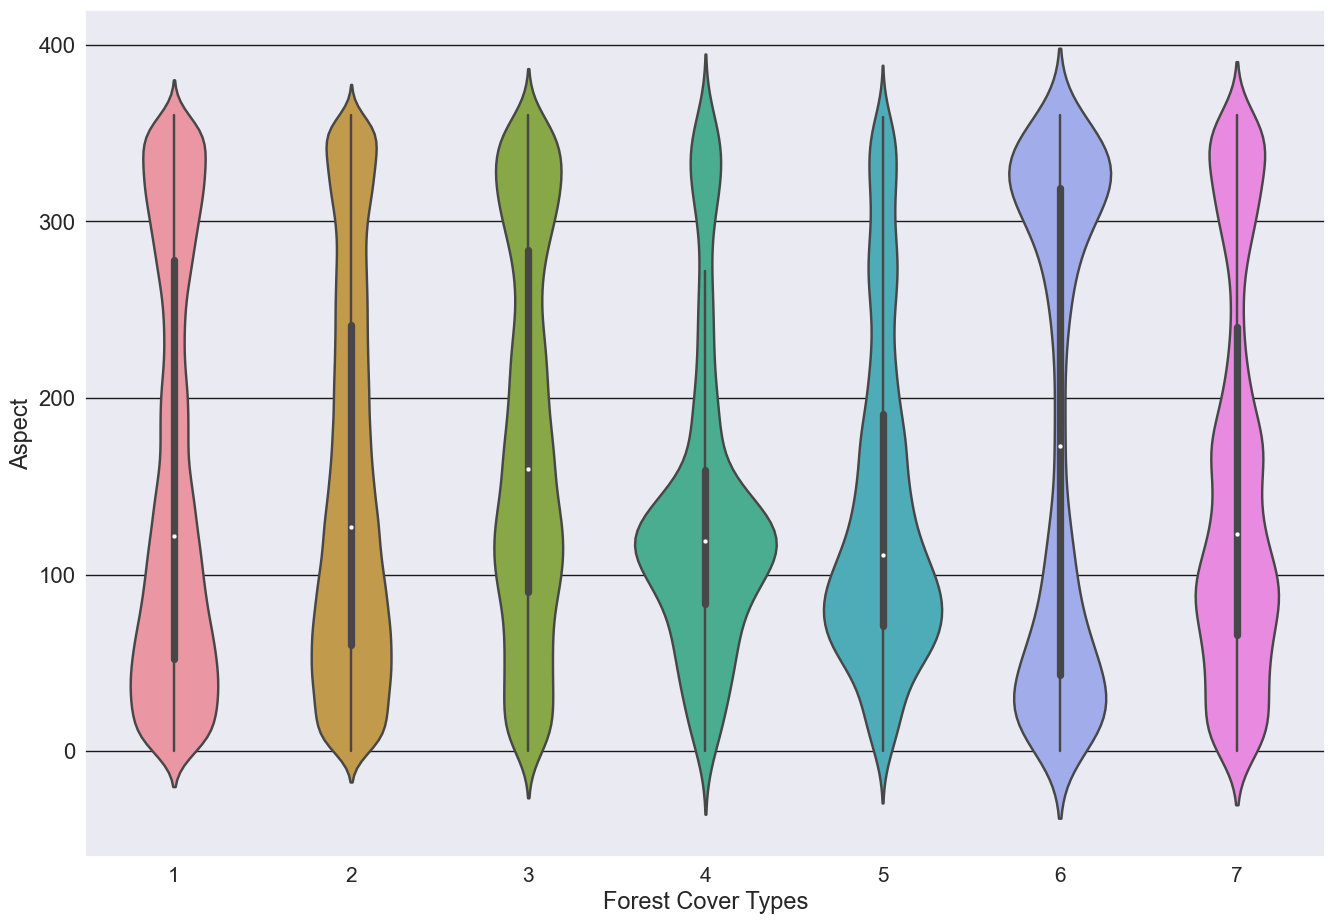

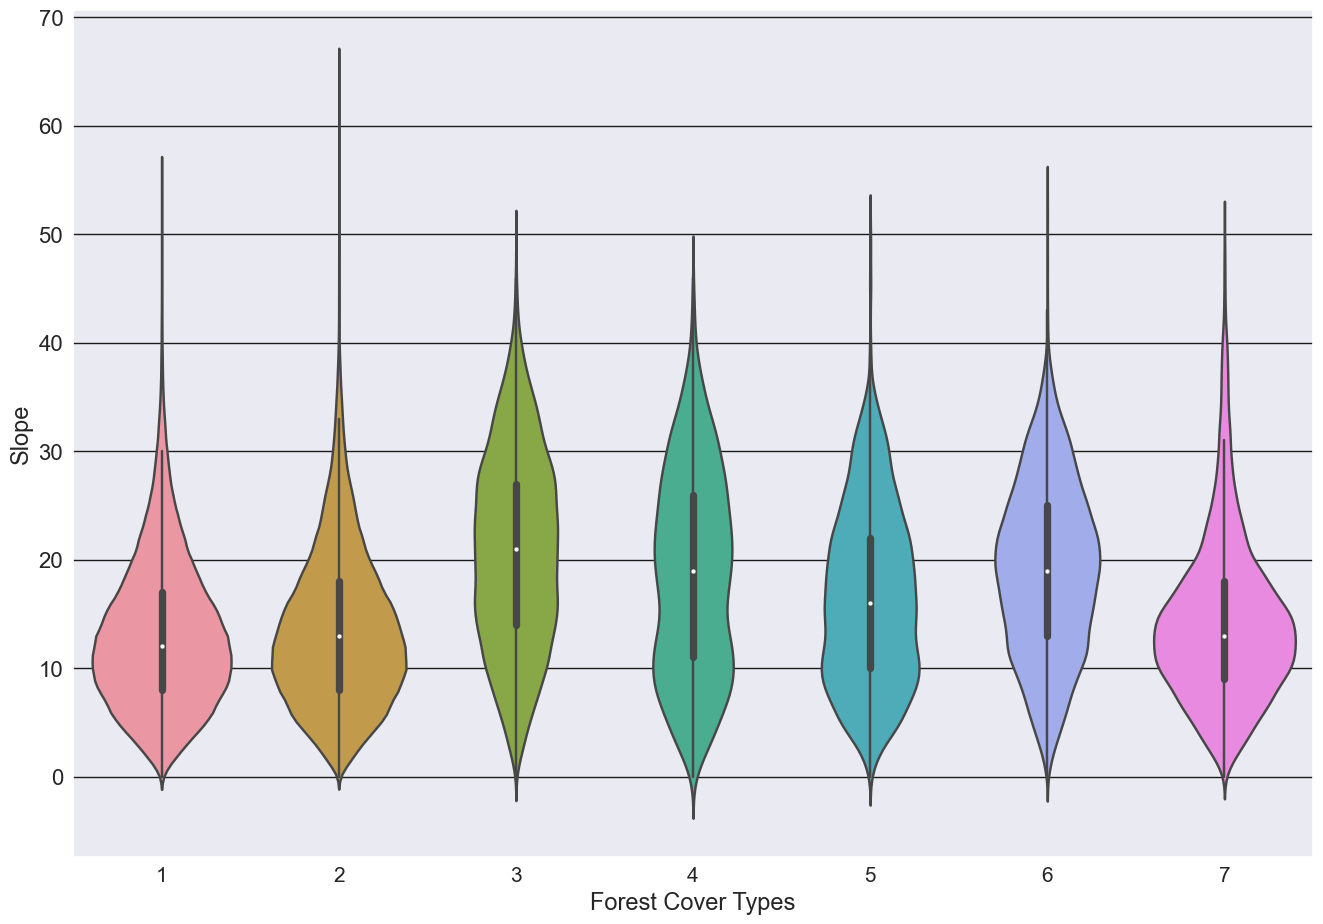

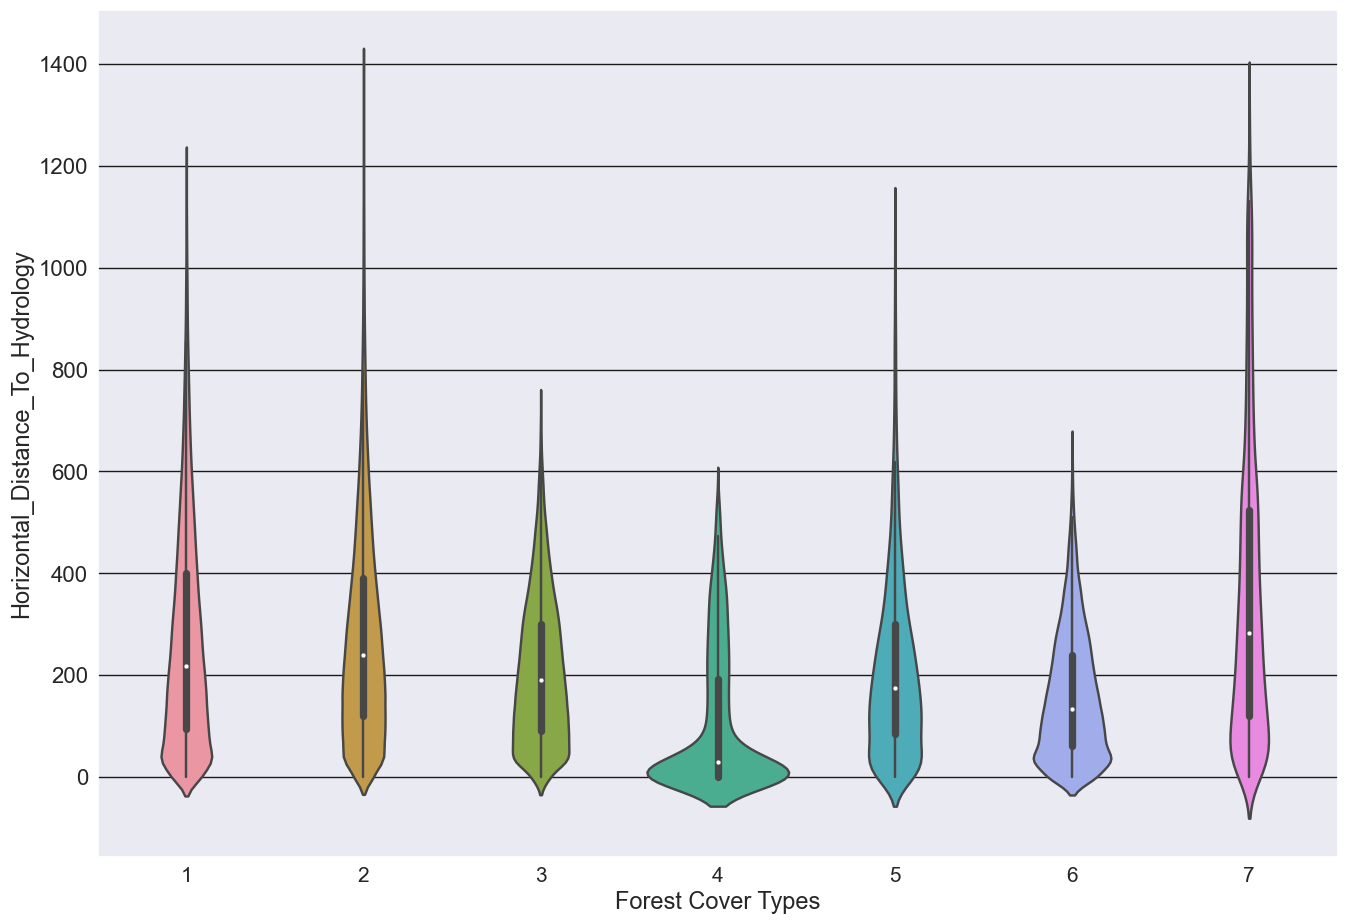

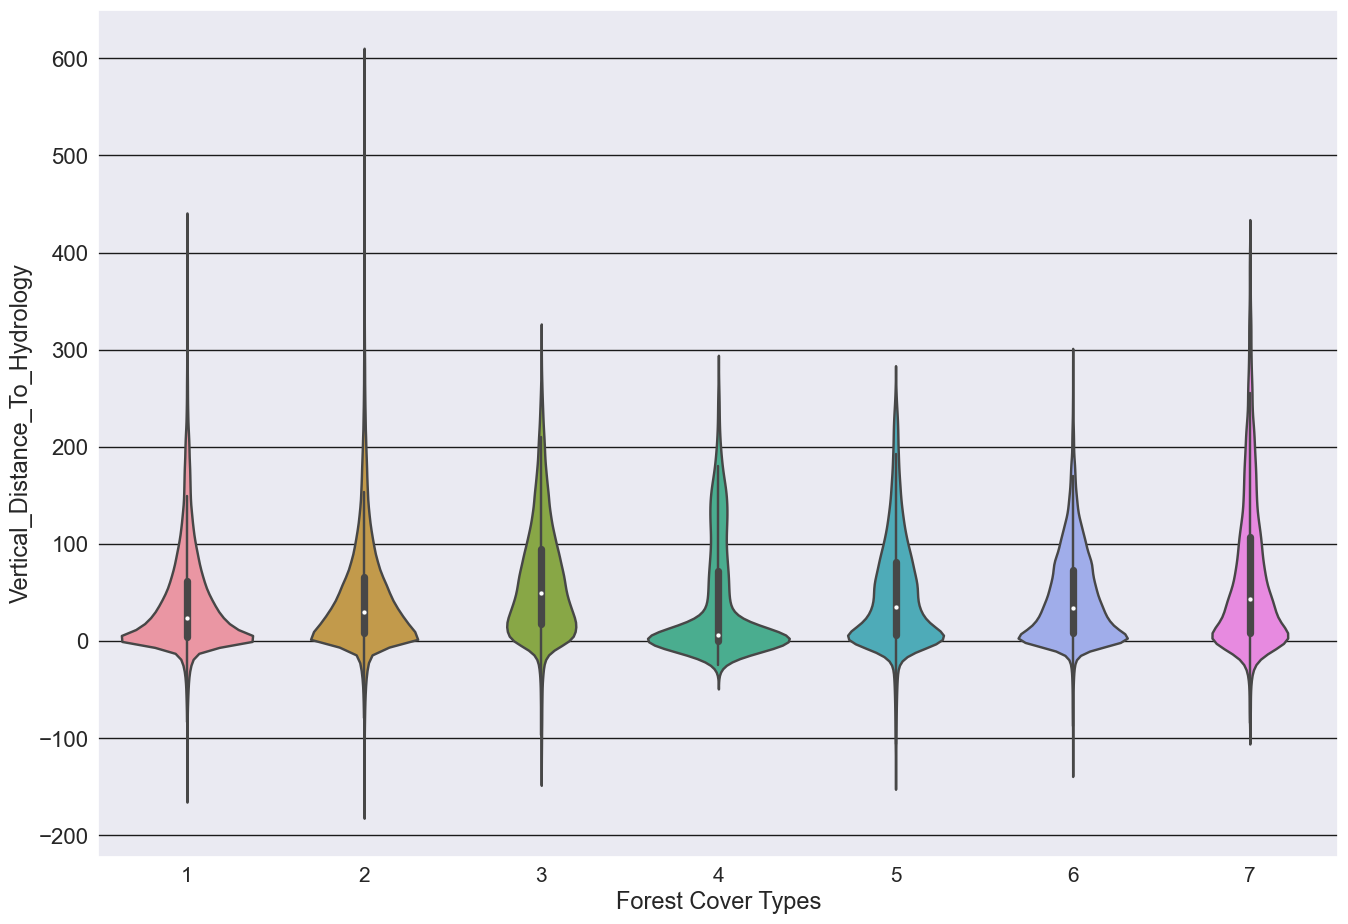

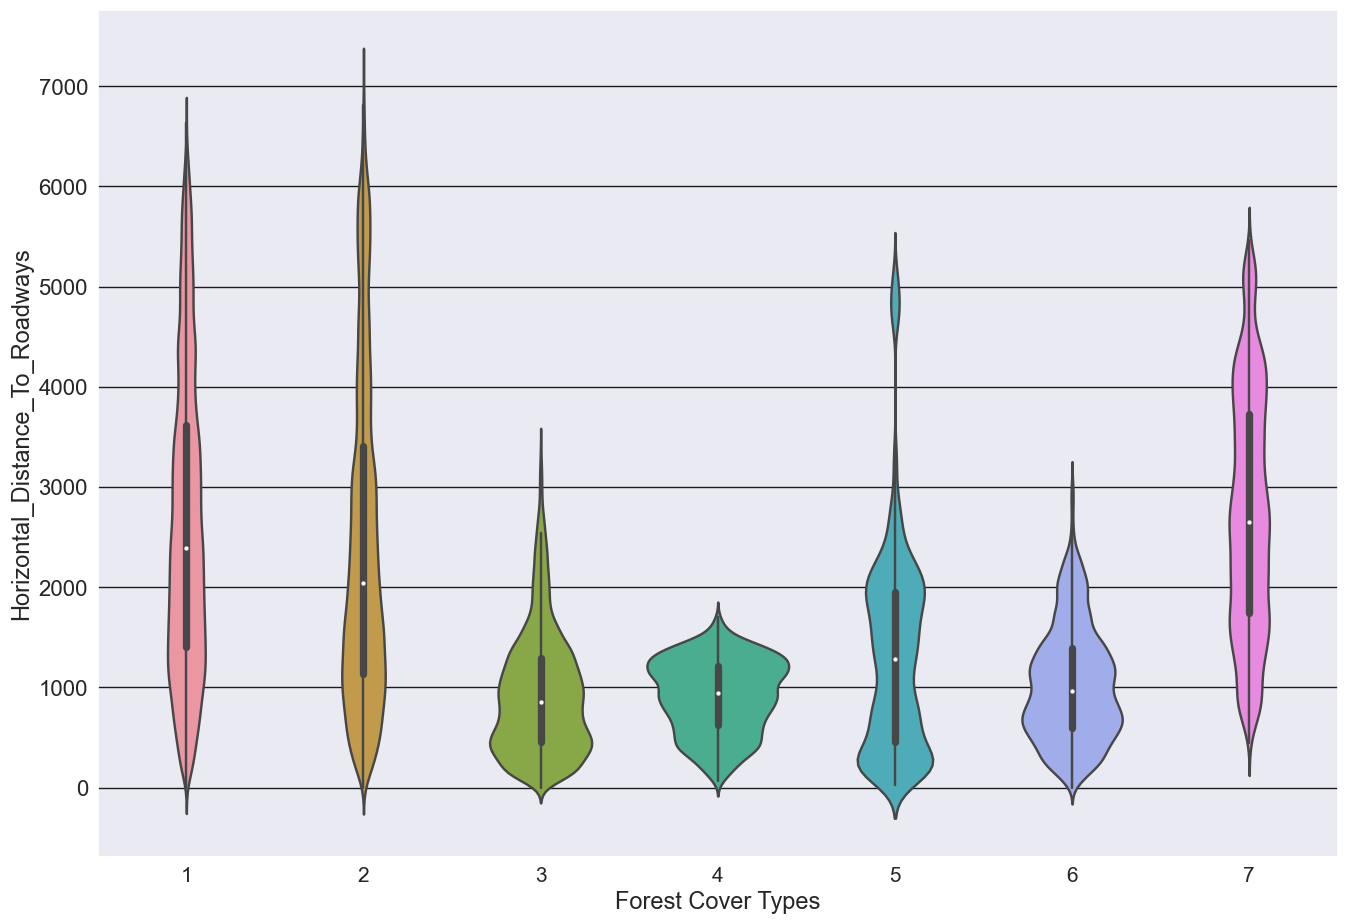

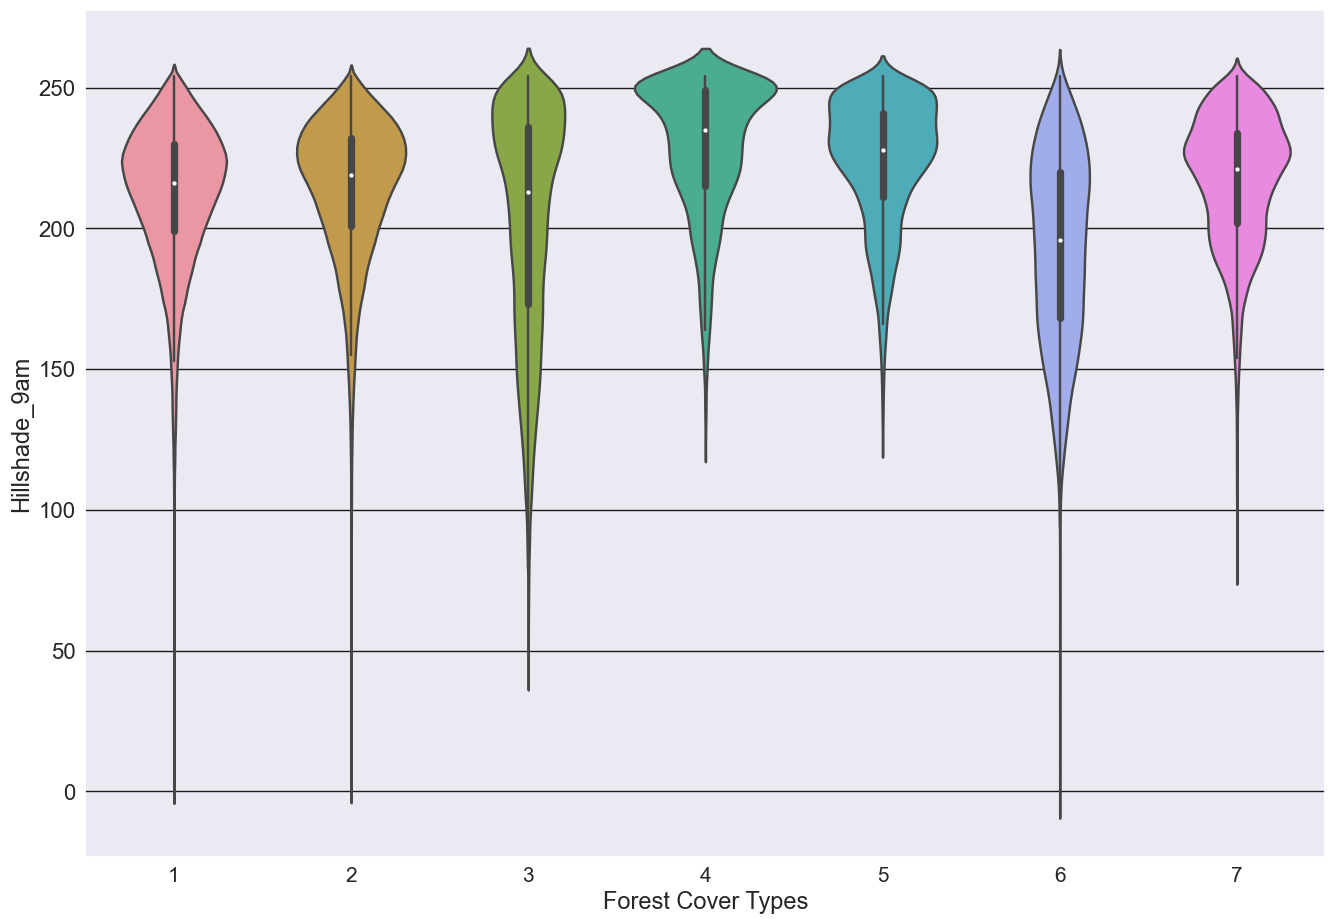

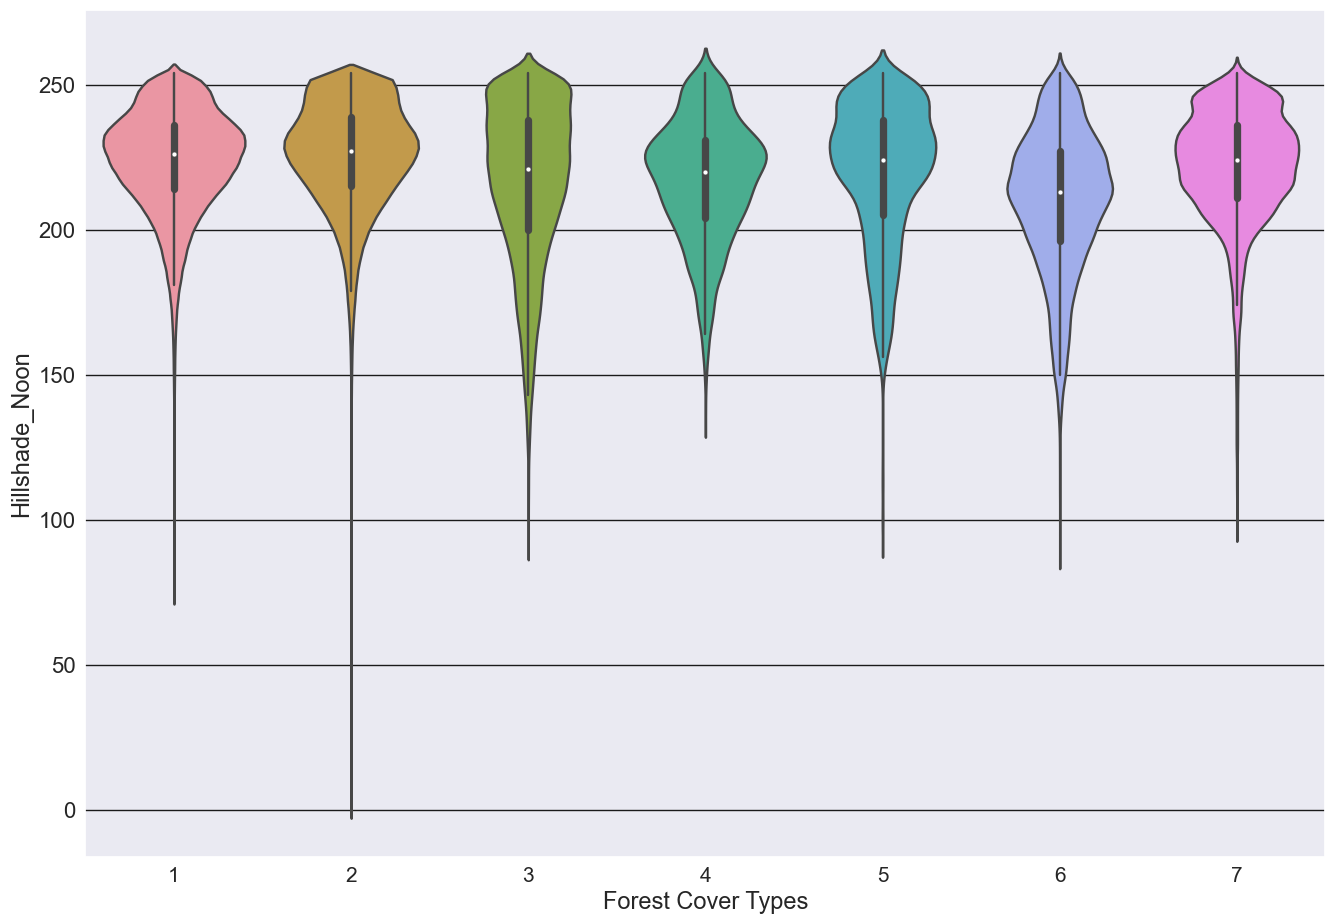

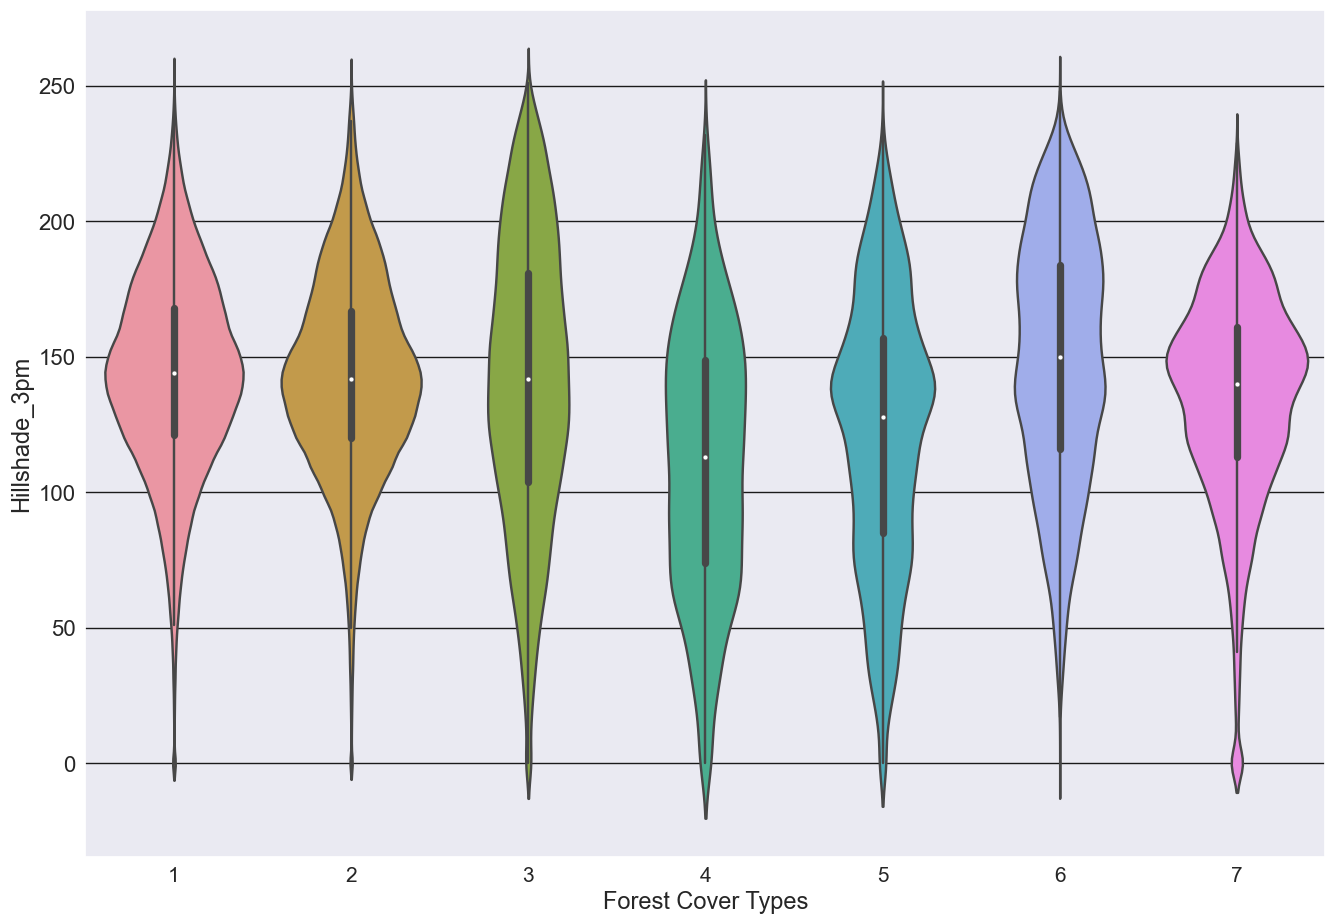

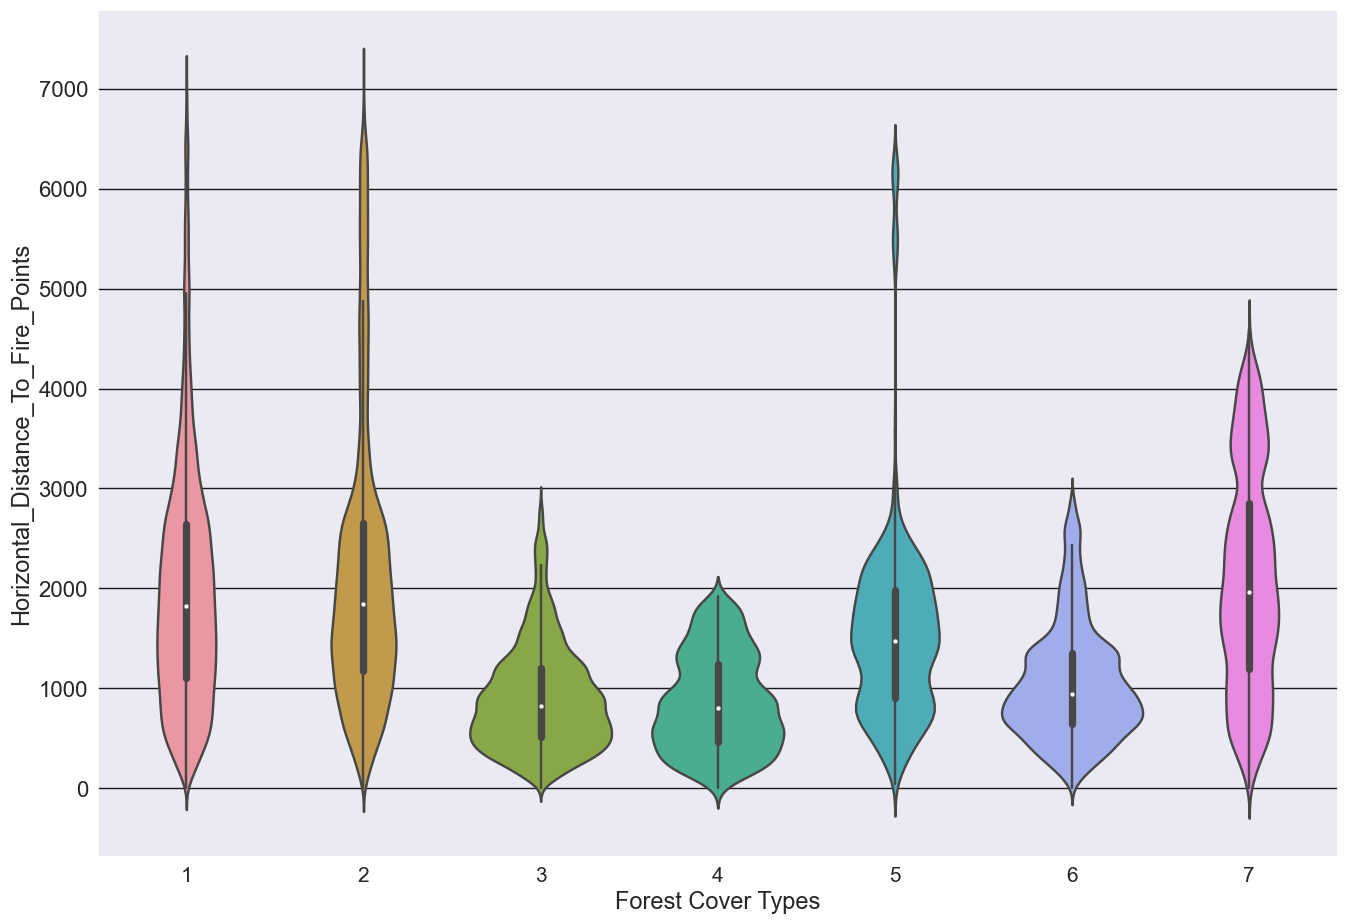

In [18]:
sns.set_style("darkgrid", {'grid.color': '.1'})

# setting target variable
target = data['Cover_Type']

# features to be compared with target variable
features = continous_data.columns


# loop for plotting Violin Plot for each features in the data
for i in range(0, len(features)):
    
    #figure size
    plt.subplots(figsize=(16, 11))
    sns.violinplot(data=continous_data, x=target, y = features[i])
    
    # x-axis label size
    plt.xticks(size = 15)
    # y-axis label size
    plt.yticks(size = 16)

    # Horizontal axis Label
    plt.xlabel('Forest Cover Types', size = 17)
    # Vertical axis Label
    plt.ylabel(features[i], size = 17)
  
    # display plot
    plt.show()

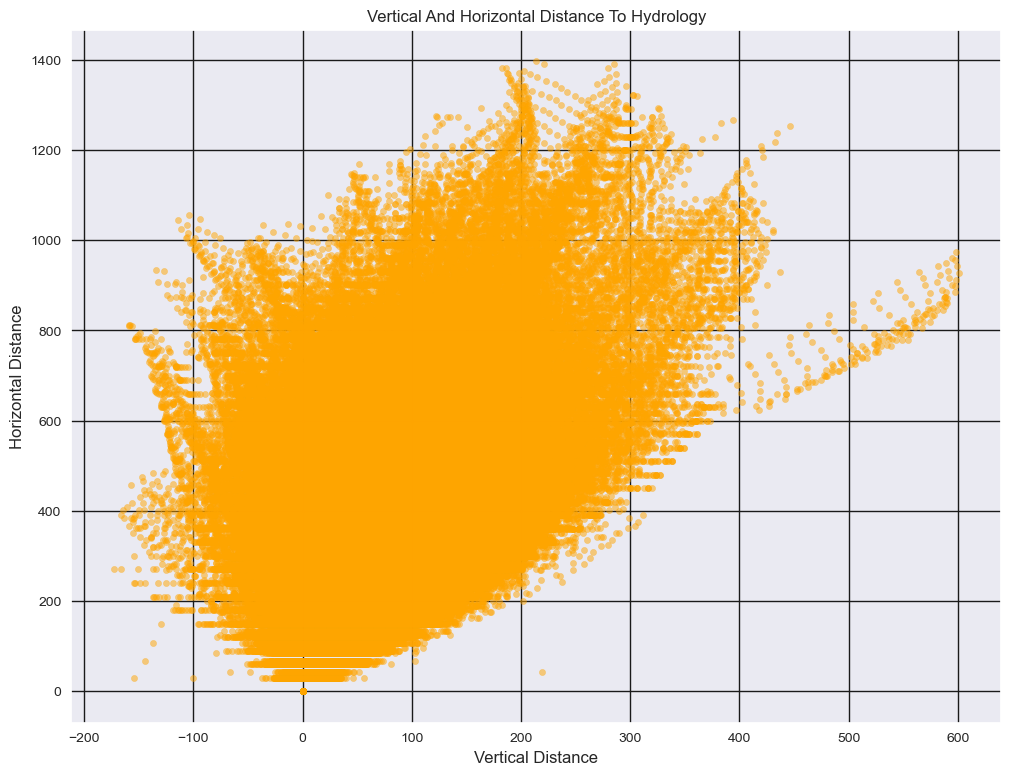

In [19]:
data.plot(kind='scatter', x='Vertical_Distance_To_Hydrology', 
              y='Horizontal_Distance_To_Hydrology', alpha=0.5, 
              color='orange', figsize = (12,9))

plt.title('Vertical And Horizontal Distance To Hydrology')
plt.xlabel("Vertical Distance")
plt.ylabel("Horizontal Distance")

plt.show()

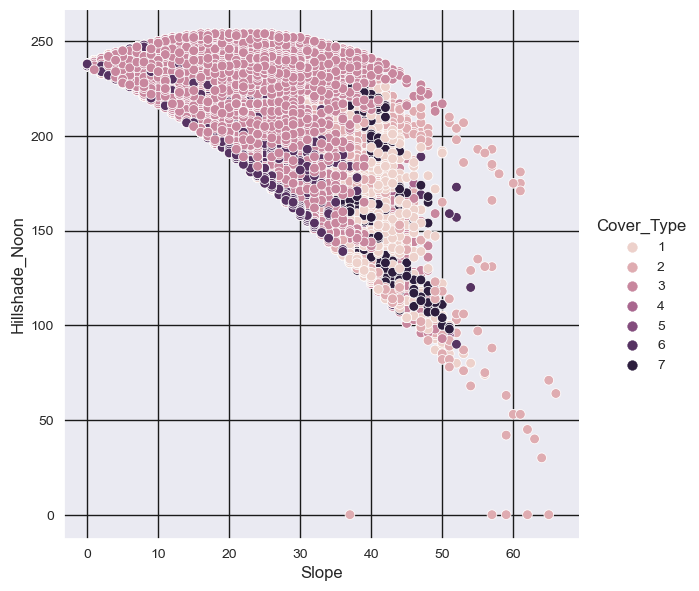

In [20]:
sns.pairplot(data, hue="Cover_Type", height=6, x_vars="Slope",y_vars="Hillshade_Noon" )
plt.show()

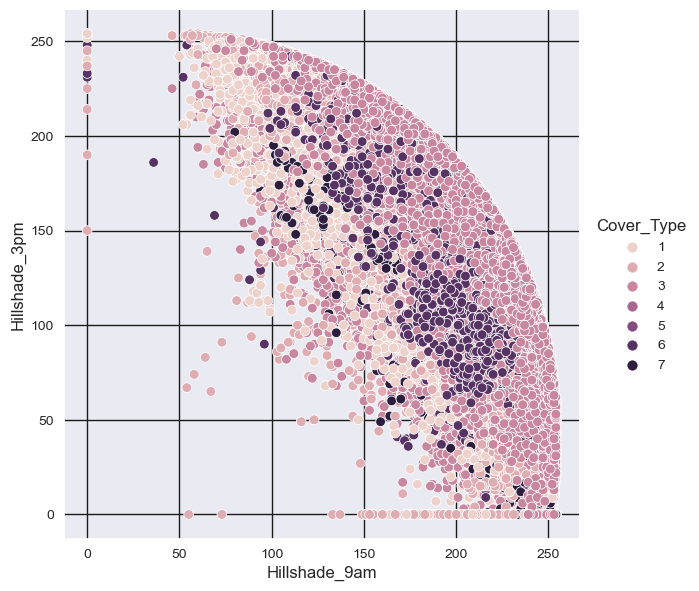

In [21]:
sns.pairplot(data, hue="Cover_Type", height=6, x_vars="Hillshade_9am",y_vars="Hillshade_3pm" )
plt.show()

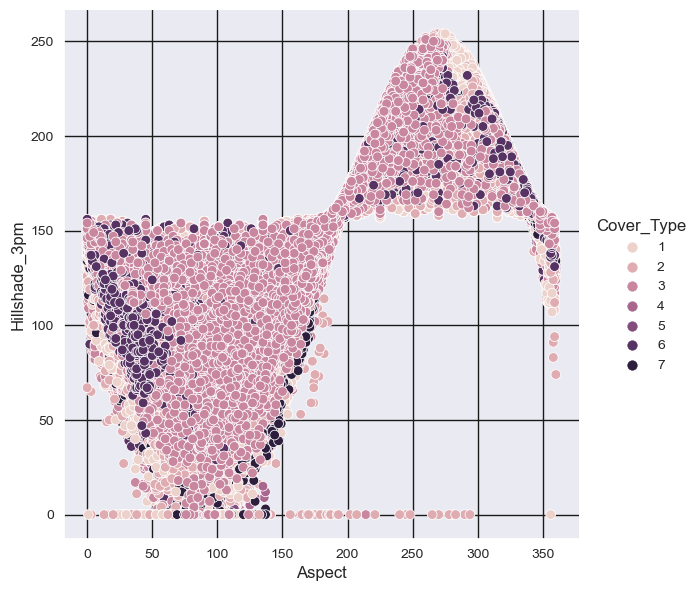

In [22]:
sns.pairplot(data, hue="Cover_Type", height=6, x_vars="Aspect",y_vars="Hillshade_3pm" )
plt.show()

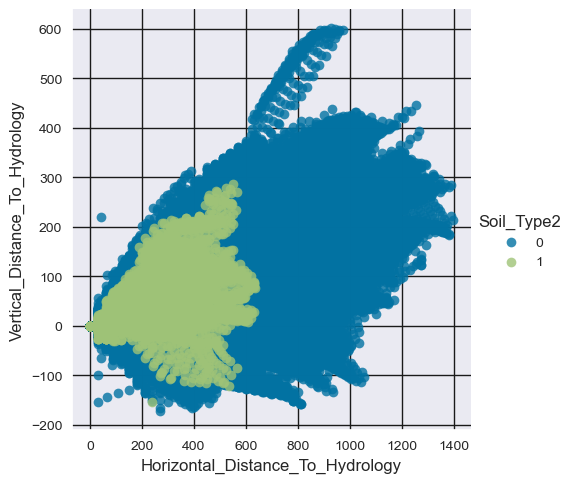

In [23]:
sns.lmplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=data, hue='Soil_Type2',fit_reg=False)

# Class Imbalance

Data is large and unbalanced. Oversampling has many challanges for this data. So we use UNDERSAMPLING technique. We choose a sample according to Cover Type 4 that has the least row counts(2747).

In [24]:
data.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [25]:
row_num=data.Cover_Type.value_counts().min()
df2=pd.DataFrame()

for i in data.Cover_Type.unique():
    df2=pd.concat([df2,data[data.Cover_Type==i].sample(row_num)])

In [26]:
df2.Cover_Type.value_counts()

5    2747
2    2747
1    2747
7    2747
3    2747
6    2747
4    2747
Name: Cover_Type, dtype: int64

# Model Building

In [27]:
X=data.loc[:,'Elevation':'Soil_Type40']
y=data['Cover_Type']

In [28]:
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [29]:
X.drop(rem, axis=1, inplace=True)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)


In [31]:
AC = [] # Accuracy comparisons of the algorithms

# Logistic Regression

In [32]:
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(logreg_pred , y_test)
AC.append(logreg_accuracy)

# Decision Tree Classifier

In [33]:
dectree = DecisionTreeClassifier()
dectree.fit(x_train, y_train)
dectree_pred = dectree.predict(x_test)
dectree_accuracy = accuracy_score(dectree_pred , y_test)
AC.append(dectree_accuracy)

Lets look at how important different feature are when predicting the Target variable.

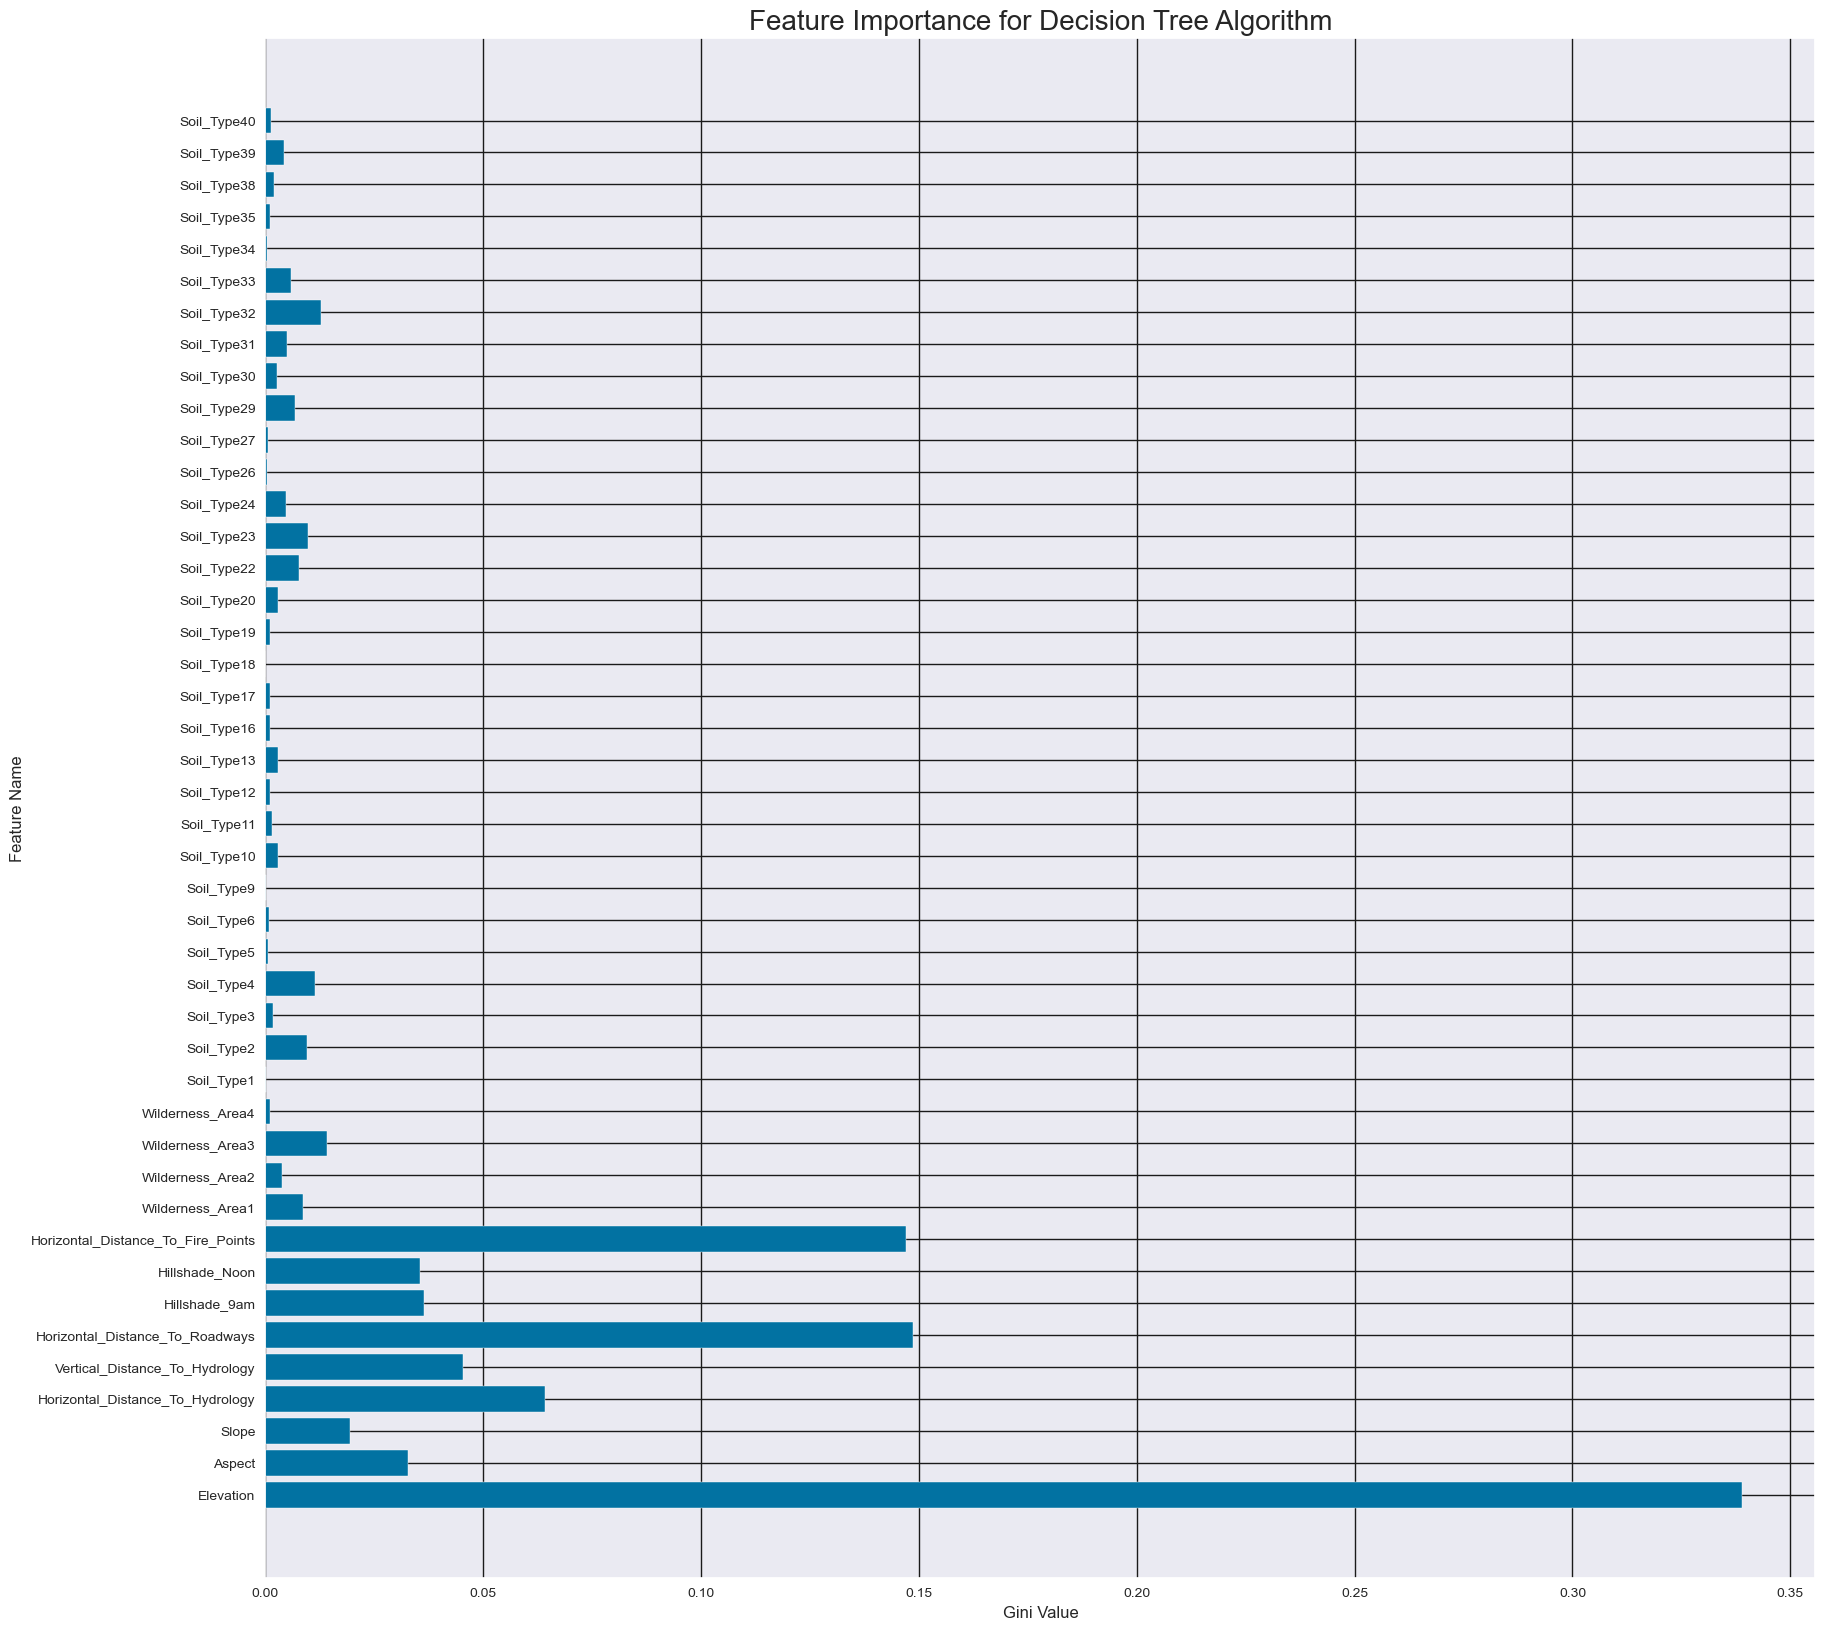

In [34]:
plt.figure(figsize=(20,20))
plt.barh(x_train.columns.values, dectree.feature_importances_)
plt.title('Feature Importance for Decision Tree Algorithm',fontsize=20)
plt.ylabel('Feature Name')
plt.xlabel('Gini Value')
plt.show()

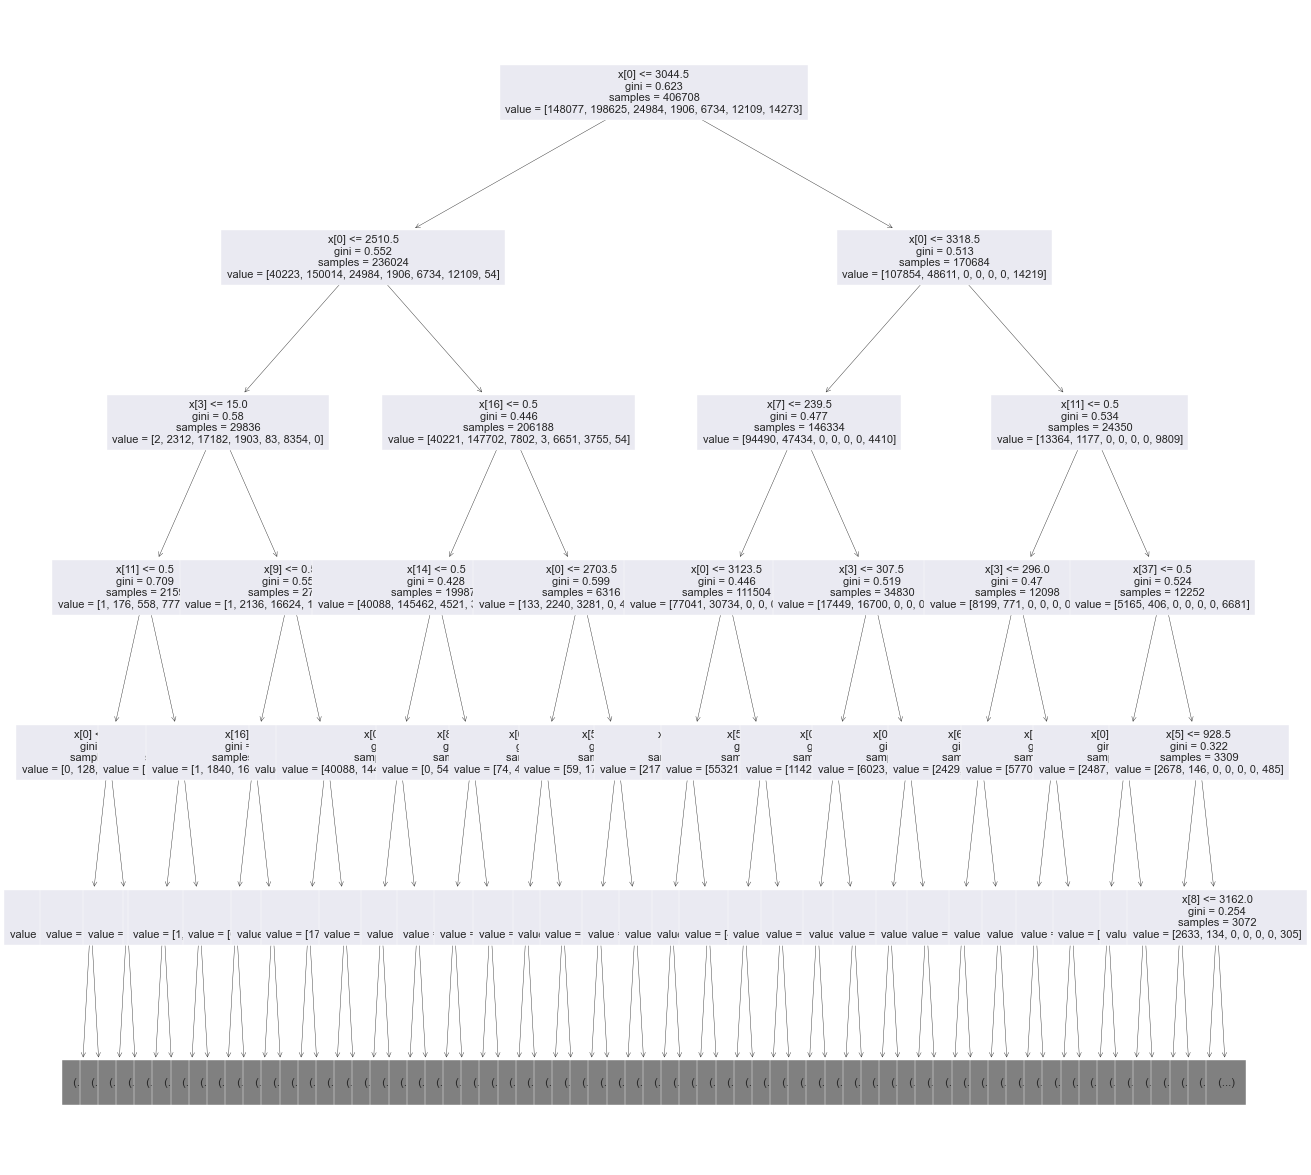

In [35]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(dectree, max_depth=5, fontsize=8)
plt.show()

# Random Forest Classifier

In [36]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
randfor_accuracy = accuracy_score(y_pred , y_test)
AC.append(randfor_accuracy)

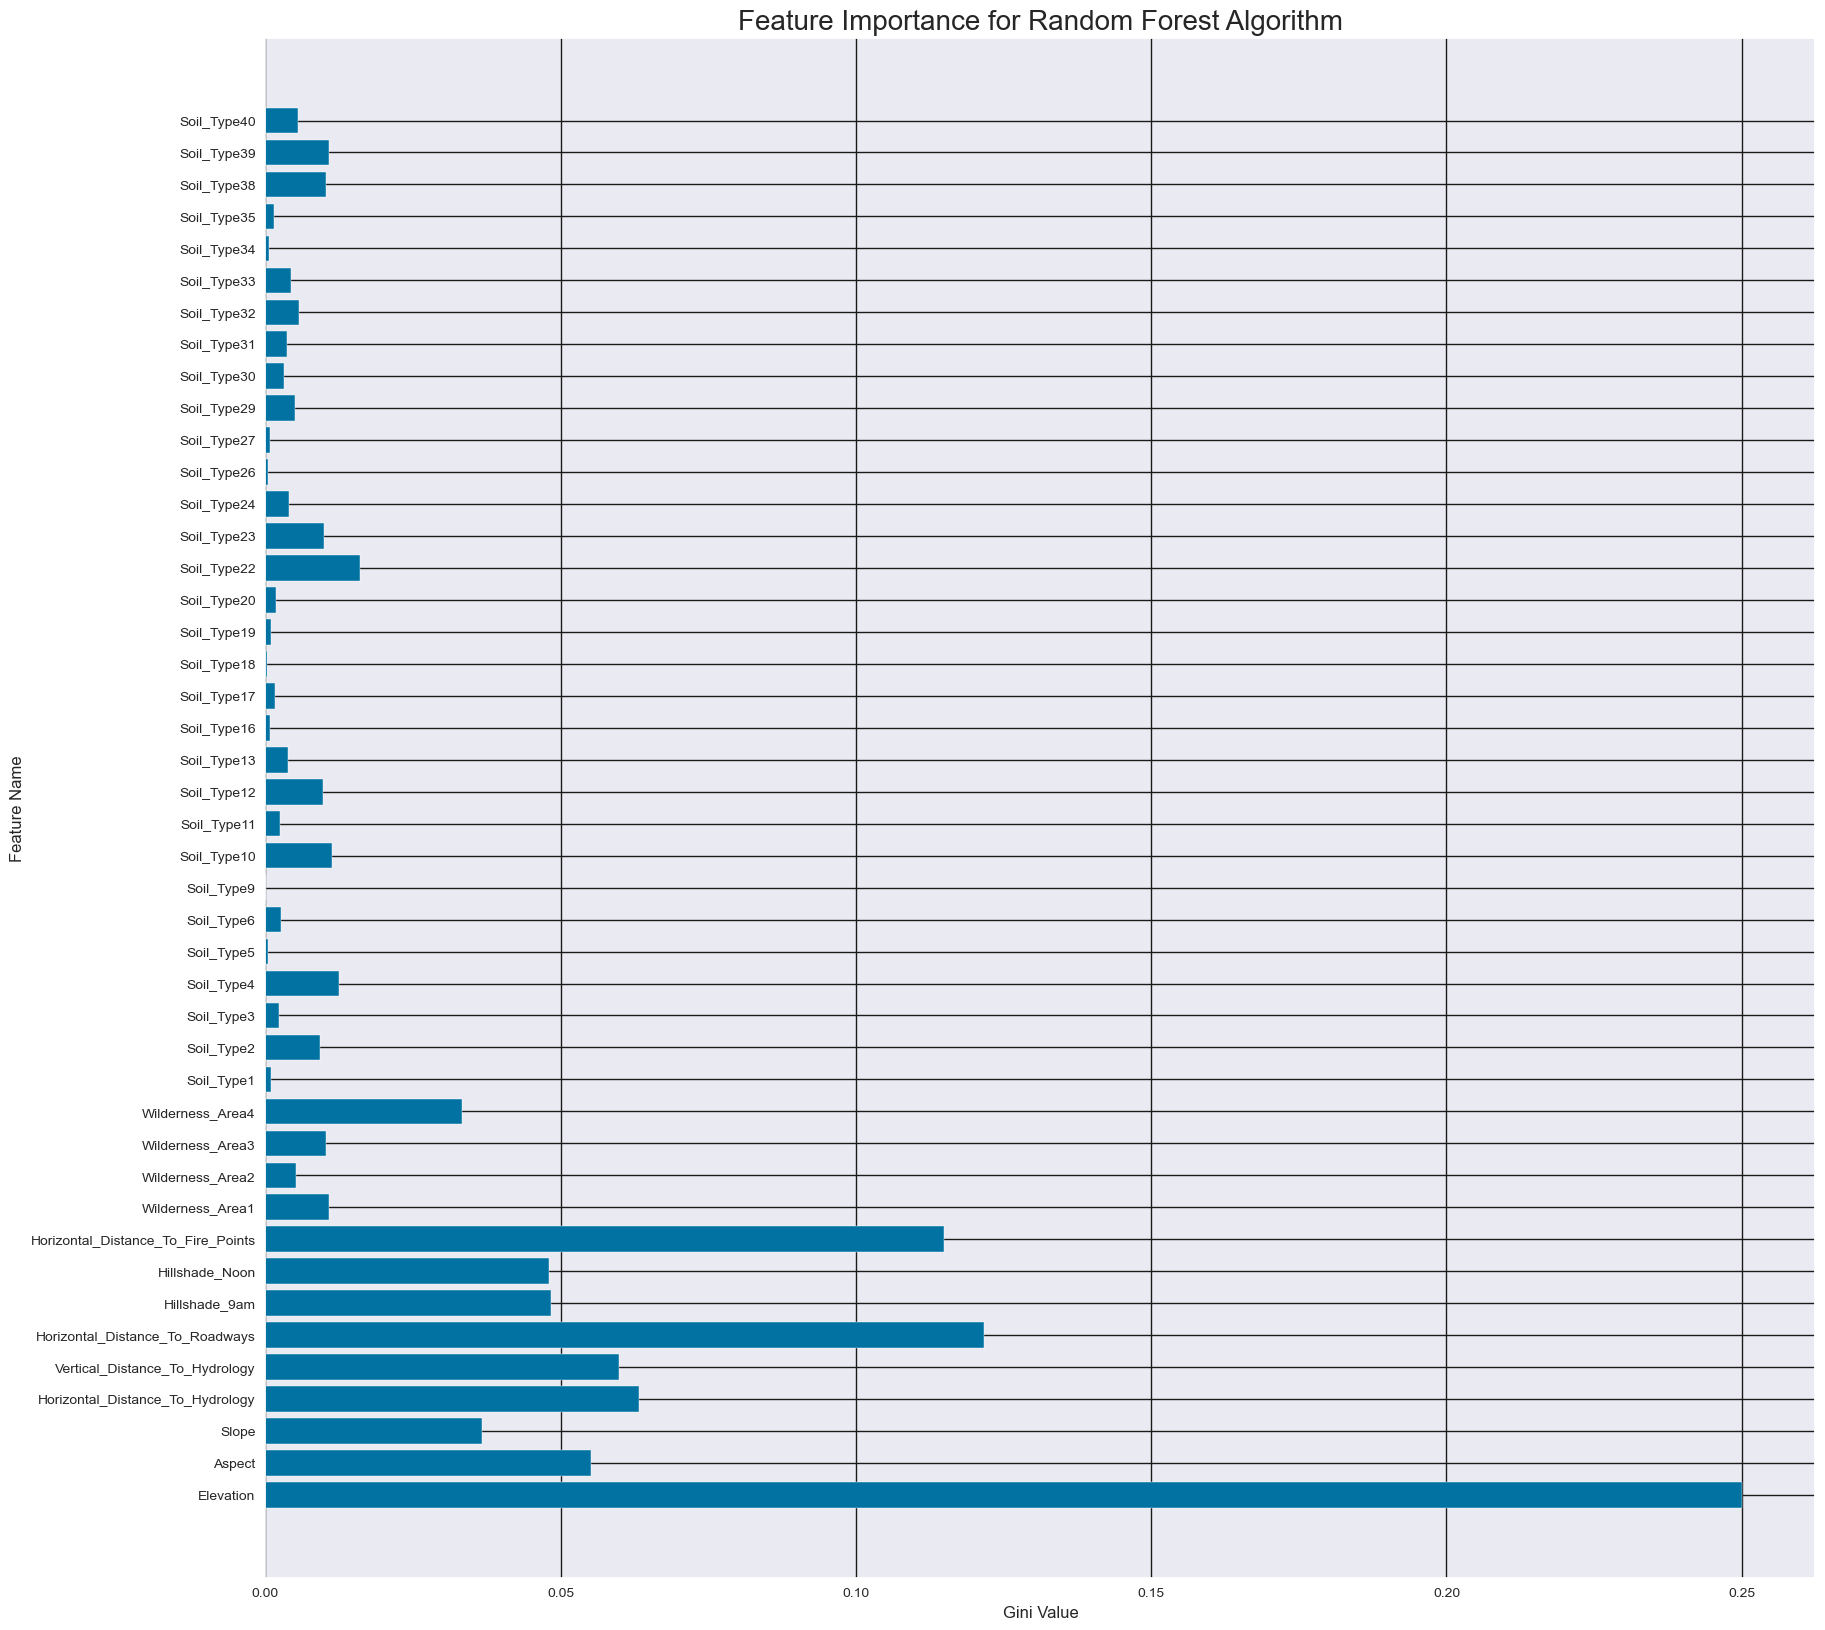

In [37]:
plt.figure(figsize=(20,20))
plt.barh(x_train.columns.values, rfc.feature_importances_)
plt.title('Feature Importance for Random Forest Algorithm',fontsize=20)
plt.ylabel('Feature Name')
plt.xlabel('Gini Value')
plt.show()

In [38]:
accuracydata = pd.DataFrame(data=None,columns=['Accuracy'], index=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier'])
accuracydata['Accuracy'][0] = AC[0]
accuracydata['Accuracy'][1] = AC[1]
accuracydata['Accuracy'][2] = AC[2]
accuracydata

,Accuracy
Logistic Regression,0.698182
Decision Tree Classifier,0.934138
Random Forest Classifier,0.956312


Random Forest Classifer gives the highest accuracy for the dataset. Lets look at the confusion matrix and class prediction error for the model.

In [39]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[60303  3274     1     0    21    12   152]
[ 1753 82535   151     0   105   104    28]
[    0   149 10371    52     8   190     0]
[  0   0  95 728   0  18   0]
[  39  537   44    0 2132    7    0]
[   8  142  367   24    6 4711    0]
[ 295   33    0    0    0    0 5909]
              precision    recall  f1-score   support

           1       0.97      0.95      0.96     63763
           2       0.95      0.97      0.96     84676
           3       0.94      0.96      0.95     10770
           4       0.91      0.87      0.89       841
           5       0.94      0.77      0.85      2759
           6       0.93      0.90      0.91      5258
           7       0.97      0.95      0.96      6237

    accuracy                           0.96    174304
   macro avg       0.94      0.91      0.93    174304
weighted avg       0.96      0.96      0.96    174304



In [40]:
rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1_score = f1_score(y_test, y_pred, average='weighted')
rfc_recall = recall_score(y_test, y_pred, average='weighted')
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)


rfc_accuracy: 0.9563119607123187 
rfc_f1_score: 0.9560895993941124 
rfc_recall: 0.9563119607123187


Cross Validation Scores

In [41]:
rfc_accuracy = cross_val_score(rfc, x_test, y_test,cv = 10).mean()
rfc_f1_score = cross_val_score(rfc, x_test, y_test,cv = 10,scoring='f1_weighted').mean()
rfc_recall = cross_val_score(rfc, x_test, y_test,cv = 10,scoring='recall_weighted').mean()
print('rfc_accuracy:',rfc_accuracy,
      '\nrfc_f1_score:',rfc_f1_score,
      '\nrfc_recall:',rfc_recall)

rfc_accuracy: 0.9308105375269816 
rfc_f1_score: 0.9304263217514084 
rfc_recall: 0.931309668055011


Visualization of Confusion Matrix with Table

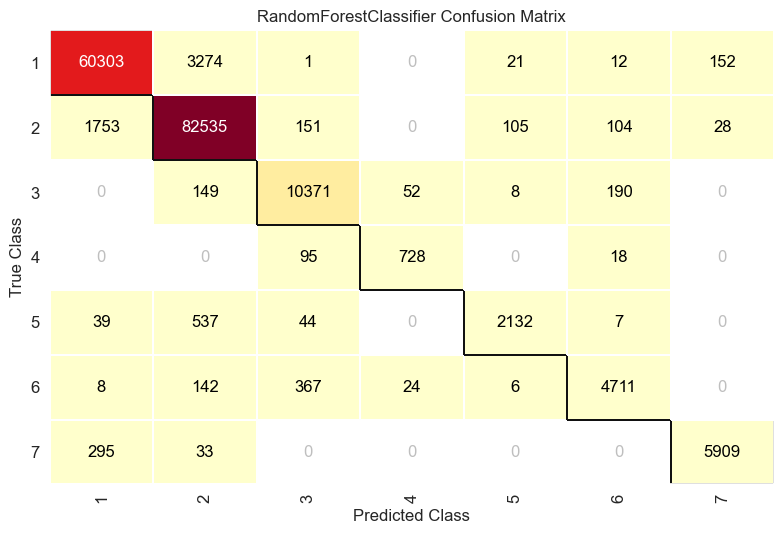

In [42]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rfc)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)

cm.show();

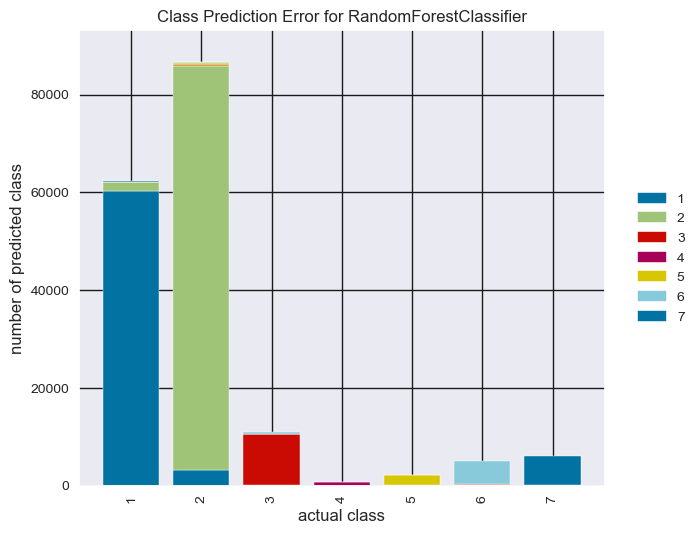

In [43]:

visualizer = ClassPredictionError(rfc)

# Fit the training data to the visualizer
visualizer.fit(x_train, y_train)

# Evaluate the model on the test data
visualizer.score(x_test, y_test)

# Draw visualization
visualizer.show();